# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd


# visualization
import matplotlib.pyplot as plt

%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

### Step 3. Assign it to a variable apple

In [2]:
apple = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv")
apple.head()


,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 4.  Check out the type of the columns

In [3]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [4]:
apple.Date = pd.to_datetime(apple['Date'])
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

### Step 6.  Set the date as the index

In [5]:
apple.set_index('Date',inplace=True)

In [6]:
apple

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39


### Step 7.  Is there any duplicate dates?

In [7]:
apple.index.is_unique

True

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [11]:
apple.sort_index(ascending=True).head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


### Step 9. Get the last business day of each month

In [12]:
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 10.  What is the difference in days between the first day and the oldest

In [21]:
apple.index[len(apple)-1] - apple.index[0]

Timedelta('-12261 days +00:00:00')

In [31]:
apple.index.values.max() - apple.index.values.min()

numpy.timedelta64(1059350400000000000,'ns')

### Step 11.  How many months in the data we have?

In [57]:
m = pd.DataFrame( apple.index.values, columns=['date'])
m.groupby([m['date'].dt.year,m['date'].dt.month]).count().sum()

date    8465
dtype: int64

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

In [63]:
help(apple.plot.line)

Help on method line in module pandas.plotting._core:

line(x=None, y=None, **kwargs) method of pandas.plotting._core.PlotAccessor instance
    Plot Series or DataFrame as lines.
    
    This function is useful to plot lines using DataFrame's values
    as coordinates.
    
    Parameters
    ----------
    x : int or str, optional
        Columns to use for the horizontal axis.
        Either the location or the label of the columns to be used.
        By default, it will use the DataFrame indices.
    y : int, str, or list of them, optional
        The values to be plotted.
        Either the location or the label of the columns to be used.
        By default, it will use the remaining DataFrame numeric columns.
    **kwargs
        Keyword arguments to pass on to :meth:`DataFrame.plot`.
    
    Returns
    -------
    :class:`matplotlib.axes.Axes` or :class:`numpy.ndarray`
        Return an ndarray when ``subplots=True``.
    
    See Also
    --------
    matplotlib.pyplot.plot : 

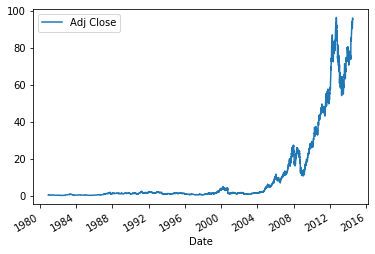

In [60]:
apple.plot.line( y= 'Adj Close' )

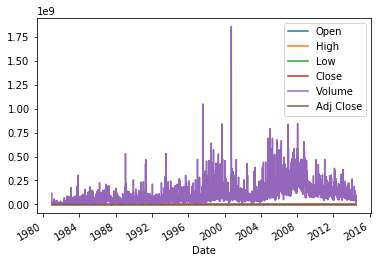

In [62]:
apple.plot.line()

### BONUS: Create your own question and answer it.